<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/AnamolyDetection/HTTP_Response/Supervised/Monitor_Latency_StatusCode_Supervised_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np
!pip install pyod

from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [2]:
train = pd.read_csv("Traffic_train.csv")
test = pd.read_csv("Traffic_test3.csv")
print(train.head())

   Delay  Code  Y
0  15000   302  1
1      0   302  1
2      0   302  1
3  11000   302  1
4  19000   302  1


In [3]:
print(train['Code'].unique())

[302 200 404 400 201 500 204]


In [4]:
train['Code'].value_counts()

200    5918
201     953
400     663
404     314
204     173
500      36
302      35
Name: Code, dtype: int64

In [7]:
one_hot_encoded_train = pd.get_dummies(train, columns = ['Code'])
print(one_hot_encoded_train)

      Delay  Y  Code_200  Code_201  Code_204  Code_302  Code_400  Code_404  \
0     15000  1         0         0         0         1         0         0   
1         0  1         0         0         0         1         0         0   
2         0  1         0         0         0         1         0         0   
3     11000  1         0         0         0         1         0         0   
4     19000  1         0         0         0         1         0         0   
...     ... ..       ...       ...       ...       ...       ...       ...   
8087  13000  1         1         0         0         0         0         0   
8088  14000  1         1         0         0         0         0         0   
8089  21000  1         1         0         0         0         0         0   
8090  15000  1         1         0         0         0         0         0   
8091  17000  1         1         0         0         0         0         0   

      Code_500  
0            0  
1            0  
2           

In [27]:
train = one_hot_encoded_train[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500","Y"]]

In [28]:
print(train.head)

<bound method NDFrame.head of       Delay  Code_200  Code_201  Code_204  Code_302  Code_400  Code_404  \
0     15000         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         0         1         0         0   
3     11000         0         0         0         1         0         0   
4     19000         0         0         0         1         0         0   
...     ...       ...       ...       ...       ...       ...       ...   
8087  13000         1         0         0         0         0         0   
8088  14000         1         0         0         0         0         0   
8089  21000         1         0         0         0         0         0   
8090  15000         1         0         0         0         0         0   
8091  17000         1         0         0         0         0         0   

      Code_500  Y  
0            0  1  
1            0  1  
2        

In [29]:
X_train=train[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500"]]
y_train=train[["Y"]]

In [43]:
classifier = KNN(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:413: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [39]:
test = pd.read_csv("Traffic_test3.csv")
one_hot_encoded_test = pd.get_dummies(test, columns = ['Code'])

In [44]:
test = one_hot_encoded_test[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500","Y"]]

In [33]:
test

,Delay,Code_200,Code_201,Code_204,Code_302,Code_400,Code_404,Code_500
0,11000,1,0,0,0,0,0,0
1,14000,1,0,0,0,0,0,0
2,23000,1,0,0,0,0,0,0
3,23000,0,1,0,0,0,0,0
4,17000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
98,19000,1,0,0,0,0,0,0
99,19000,1,0,0,0,0,0,0
100,72000,1,0,0,0,0,0,0
101,26000,1,0,0,0,0,0,0


In [48]:
X_test=test[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500"]]
y_test=test[["Y"]]

In [49]:
y_pred = classifier.predict(X_test)

(103, 8)
(103, 8)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


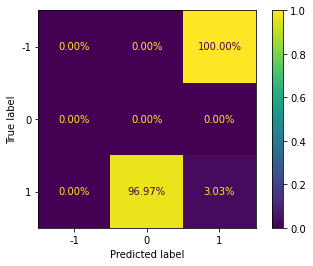

In [50]:
from sklearn.metrics import plot_confusion_matrix
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, y_pred, y_test, normalize='true', values_format='.2%');

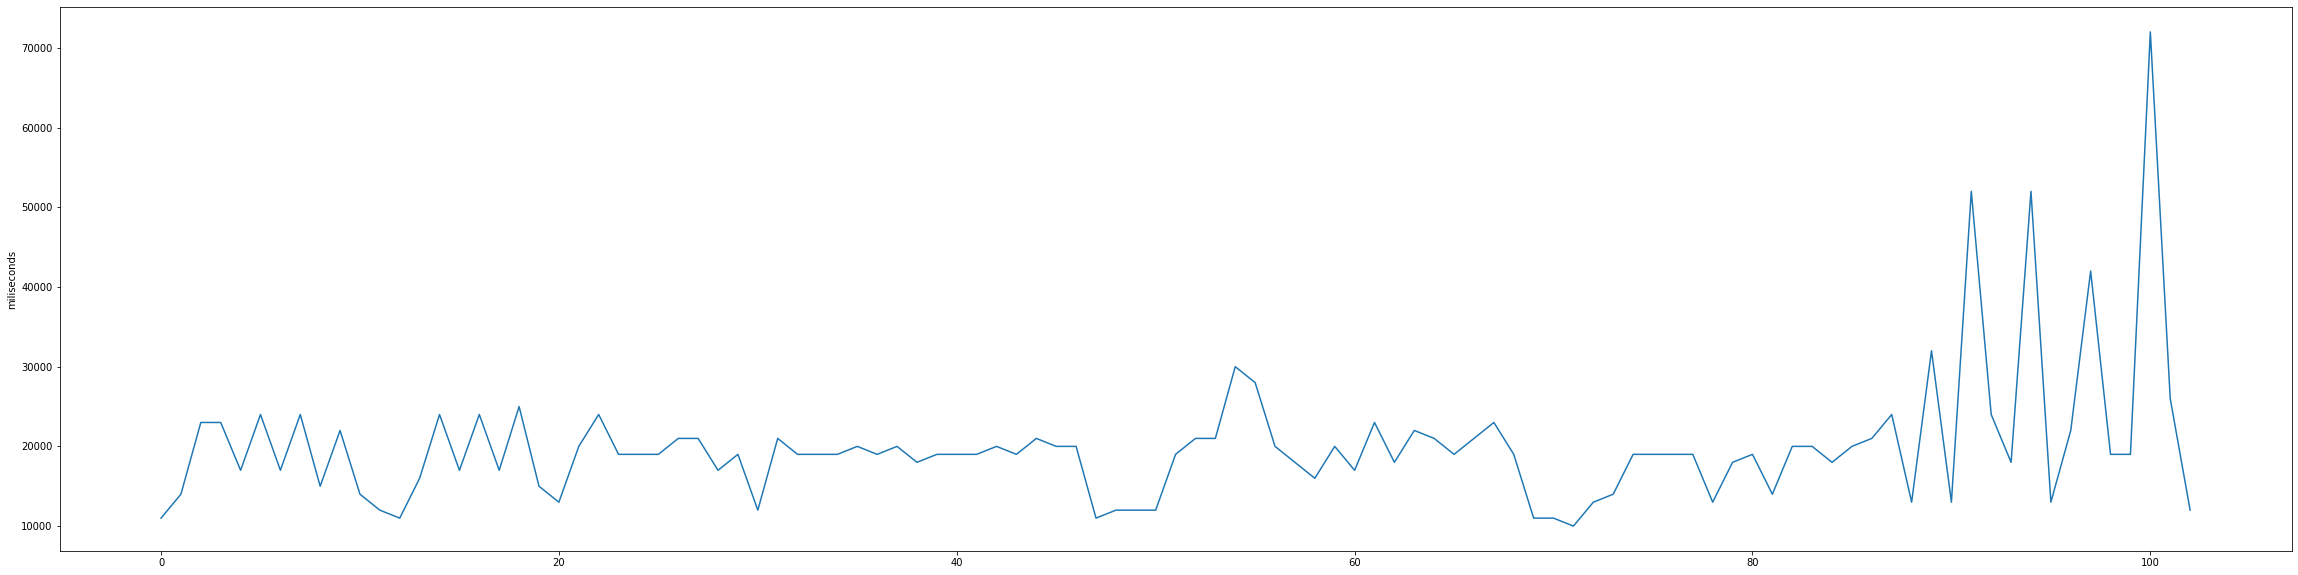

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(test['Delay'])
plt.plot(test.iloc[novel_index]['Delay'],"ro")
plt.ylabel('miliseconds')
plt.show()